In [ ]:
import sys
from pathlib import Path
import yaml
# Add repo root to sys.path
repo_root = Path.cwd().parent.parent
sys.path.append(str(repo_root))

# Load configuration yaml file
config_path = repo_root / "config" / "dataprep.yaml"
with config_path.open("r", encoding="utf-8") as fp:
    config = yaml.safe_load(fp)
# Patch base_dir to be absolute path
config["data"]["base_dir"] = repo_root / Path(config["data"]["base_dir"])

In [ ]:
from src.dataprep import RawDataSourcesConfig, load_raw_files
import matplotlib.pyplot as plt
import pandas as pd
config_obj = RawDataSourcesConfig(**config["data"])
data_frames = load_raw_files(config_obj)

In [32]:
def plot_top_categories(df, col, top_n=10):
    plt.figure(figsize=(8, 4))

    # Count category frequencies and take the top N
    top_values = (
        df[col]
        .value_counts()
        .head(top_n)
        .sort_values(ascending=True)
    )

    # Create horizontal bar plot for readability
    top_values.plot(kind="barh", color="skyblue")

    plt.title(f"Top {top_n} Categories for {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Customers dataset exploration

In [11]:
customers_df = data_frames["customers"]

# Initial description of fields in the dataset
display(customers_df.head())
display(customers_df.info())
display(customers_df.describe(include="all"))

,CLOSEDATE,MRR,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,id
0,2019-06-20,290.00,309343,201 to 1000,Other,199
1,2019-03-22,392.54,16000001,51 to 200,NaN,147
2,2020-01-08,-61.15,60502,1001 to 10000,HIGHER_EDUCATION,118
3,2019-09-19,400.00,3575321,201 to 1000,CONSUMER_SERVICES,126
4,2019-01-27,209.98,273063,26 to 50,Technology - Software,174


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CLOSEDATE       200 non-null    datetime64[ns]
 1   MRR             200 non-null    float64       
 2   ALEXA_RANK      200 non-null    int64         
 3   EMPLOYEE_RANGE  198 non-null    object        
 4   INDUSTRY        71 non-null     object        
 5   id              200 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.5+ KB


None

,CLOSEDATE,MRR,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,id
count,200,200.000000,2.000000e+02,198,71,200.000000
unique,NaN,NaN,NaN,9,39,NaN
top,NaN,NaN,NaN,6 to 10,COMPUTER_SOFTWARE,NaN
freq,NaN,NaN,NaN,56,14,NaN
mean,2019-11-15 05:31:12,320.184250,6.866970e+06,NaN,NaN,100.500000
min,2019-01-15 00:00:00,-555.000000,7.826000e+03,NaN,NaN,1.000000
25%,2019-06-25 12:00:00,150.432500,1.093701e+06,NaN,NaN,50.750000
50%,2019-11-21 12:00:00,294.400000,3.675518e+06,NaN,NaN,100.500000
75%,2020-04-21 18:00:00,400.000000,1.600000e+07,NaN,NaN,150.250000
max,2020-08-18 00:00:00,1800.000000,1.600000e+07,NaN,NaN,200.000000


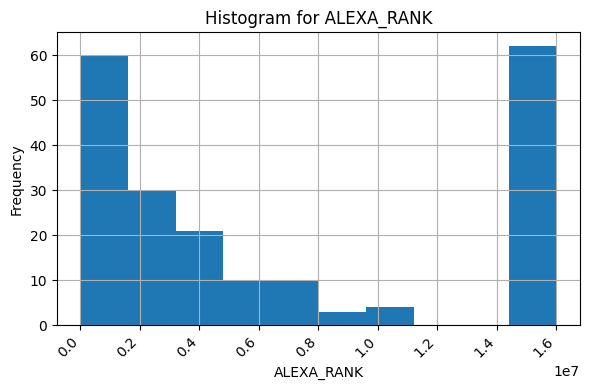

In [28]:
plt.figure(figsize=(6, 4))
customers_df["ALEXA_RANK"].hist(bins=10)
plt.title(f"Histogram for ALEXA_RANK")
plt.xlabel("ALEXA_RANK")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()                   
plt.show()

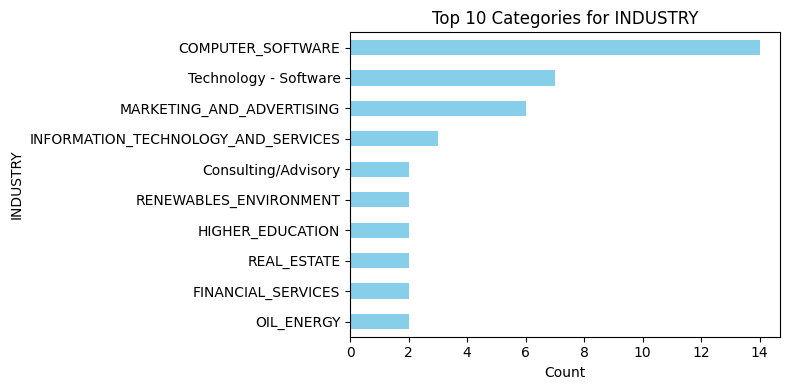

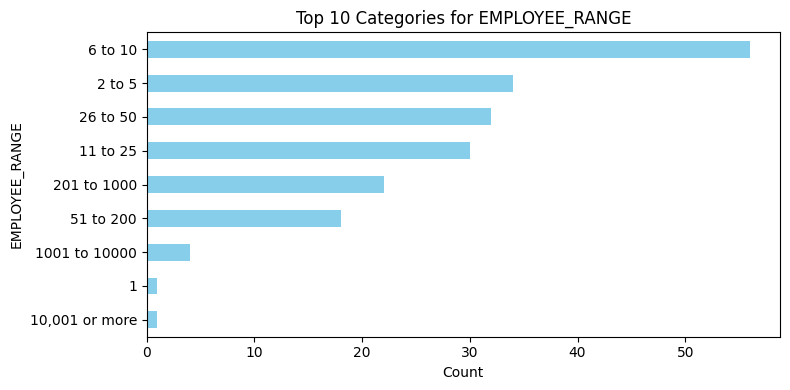

In [33]:
plot_top_categories(customers_df, "INDUSTRY", top_n=10)
plot_top_categories(customers_df, "EMPLOYEE_RANGE", top_n=10)

In [22]:
# Check for duplicates in the column id
print("Number of duplicate IDs:", customers_df["id"].duplicated().sum())

# Check for parsing issues in the closeddate column
closeddate_parsing_issues = pd.to_datetime(customers_df["CLOSEDATE"], errors="coerce").isna().sum()
print("Number of parsing issues in closeddate column:", closeddate_parsing_issues)

Number of duplicate IDs: 0
Number of parsing issues in closeddate column: 0


# Non-customer dataset exploration

In [24]:
noncustomers_df = data_frames["noncustomers"]
# Initial description of fields in the non-customer dataset
display(noncustomers_df.head())
display(noncustomers_df.info())
display(noncustomers_df.describe(include="all"))

,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,id
0,4489573.0,11 to 25,NaN,4916
1,4027013.0,6 to 10,NaN,3489
2,16000001.0,26 to 50,COMPUTER_SOFTWARE,2813
3,814822.0,1001 to 10000,HOSPITAL_HEALTH_CARE,727
4,16000001.0,26 to 50,NaN,2166


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ALEXA_RANK      4889 non-null   float64
 1   EMPLOYEE_RANGE  4471 non-null   object 
 2   INDUSTRY        1278 non-null   object 
 3   id              5003 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 156.5+ KB


None

,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,id
count,4.889000e+03,4471,1278,5003.000000
unique,NaN,9,164,NaN
top,NaN,2 to 5,COMPUTER_SOFTWARE,NaN
freq,NaN,1048,207,NaN
mean,1.139675e+07,NaN,NaN,2699.047971
std,6.595254e+06,NaN,NaN,1444.304307
min,1.300000e+01,NaN,NaN,201.000000
25%,3.955222e+06,NaN,NaN,1448.500000
50%,1.600000e+07,NaN,NaN,2699.000000
75%,1.600000e+07,NaN,NaN,3949.500000


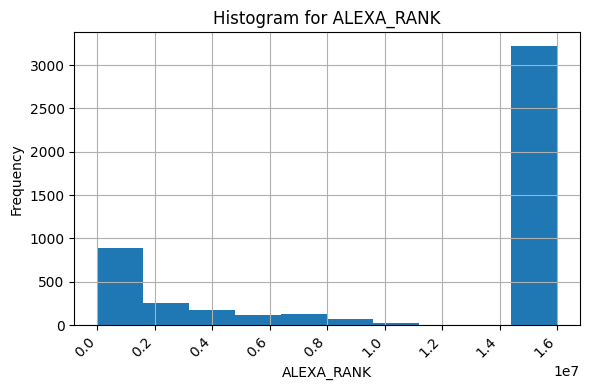

In [42]:
plt.figure(figsize=(6, 4))
noncustomers_df["ALEXA_RANK"].hist(bins=10)
plt.title(f"Histogram for ALEXA_RANK")
plt.xlabel("ALEXA_RANK")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()                   
plt.show()

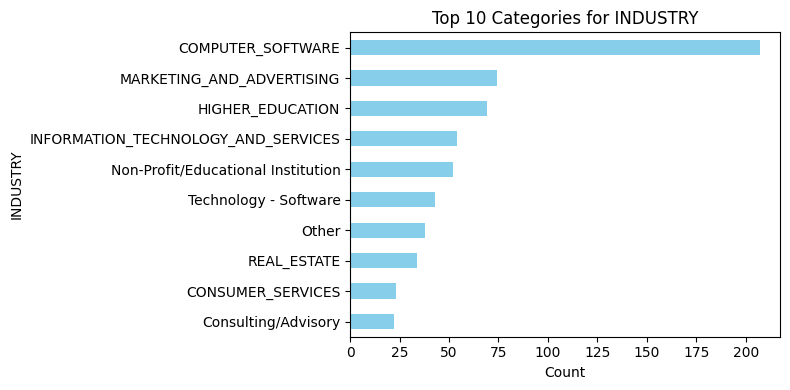

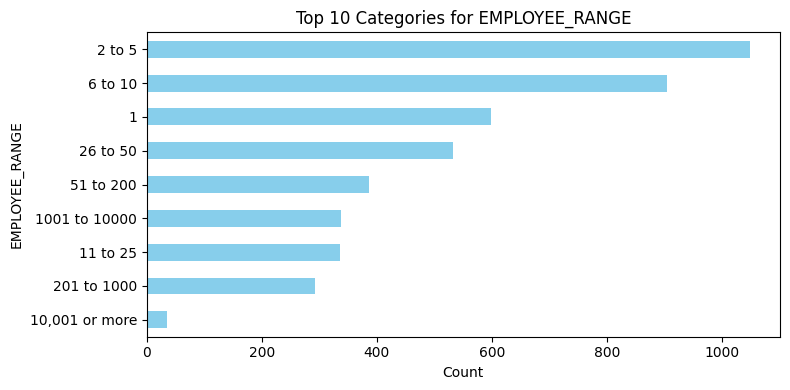

In [36]:
plot_top_categories(noncustomers_df, "INDUSTRY", top_n=10)
plot_top_categories(noncustomers_df, "EMPLOYEE_RANGE", top_n=10)

In [38]:
# Check for duplicates in the column id
print("Number of duplicate IDs:", noncustomers_df["id"].duplicated().sum())

Number of duplicate IDs: 3


Conclusions:

    -The ARR column cannot be used, as it is not available in the non-customer dataset.
    -The probability distribution of Alexa Rank is similar for both customers and non-customers.
    -There is a notable peak in Alexa Rank around 1.6 × 10⁷.
    -Both the Employee Range and Industry columns contain missing values.
    -It is necessary to clean and standardize the Employee Range and Industry fields.
    -There are duplicate IDs in the non-customer dataset that need to be addressed.

# Usage dataframe

In [40]:
usage_df = data_frames["usage"]
# Initial description of fields in the usage dataset
display(usage_df.head())
display(usage_df.info())
display(usage_df.describe(include="all"))

,WHEN_TIMESTAMP,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,id
0,2020-06-01,278,0,34,0,2,0,2,0,616
1,2020-04-20,0,0,0,0,0,0,0,0,3059
2,2019-04-29,210,1,17,11,3,1,4,1,2813
3,2020-02-24,1,1,1,0,1,1,1,0,5076
4,2020-02-17,9,9,7,0,1,1,1,0,3983


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25387 entries, 0 to 25386
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   WHEN_TIMESTAMP         25387 non-null  datetime64[ns]
 1   ACTIONS_CRM_CONTACTS   25387 non-null  int64         
 2   ACTIONS_CRM_COMPANIES  25387 non-null  int64         
 3   ACTIONS_CRM_DEALS      25387 non-null  int64         
 4   ACTIONS_EMAIL          25387 non-null  int64         
 5   USERS_CRM_CONTACTS     25387 non-null  int64         
 6   USERS_CRM_COMPANIES    25387 non-null  int64         
 7   USERS_CRM_DEALS        25387 non-null  int64         
 8   USERS_EMAIL            25387 non-null  int64         
 9   id                     25387 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.9 MB


None

,WHEN_TIMESTAMP,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,id
count,25387,25387.000000,25387.000000,25387.00000,25387.000000,25387.000000,25387.000000,25387.000000,25387.000000,25387.000000
mean,2019-12-04 18:14:30.398235392,84.637452,18.447788,28.74999,1.217434,2.237956,1.036830,1.355300,0.224682,1872.315555
min,2019-01-07 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2019-08-12 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,148.000000
50%,2019-12-23 00:00:00,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1581.000000
75%,2020-04-13 00:00:00,23.000000,2.000000,4.00000,0.000000,2.000000,1.000000,1.000000,0.000000,3394.000000
max,2020-07-27 00:00:00,27936.000000,2216.000000,7271.00000,283.000000,376.000000,60.000000,123.000000,13.000000,5200.000000
std,NaN,574.296451,93.893250,184.13845,6.209142,7.471049,3.391557,4.430318,0.755046,1698.775503


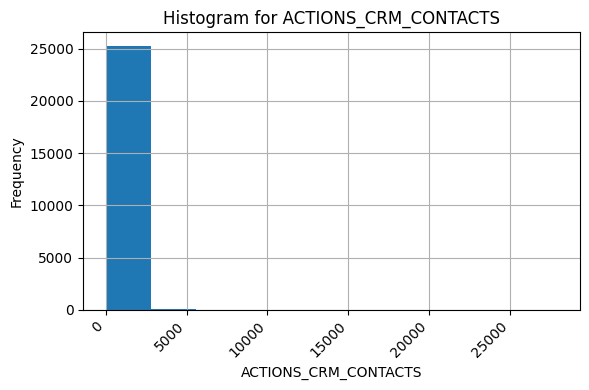

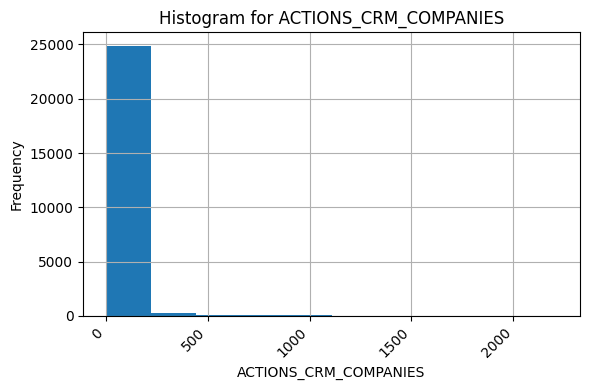

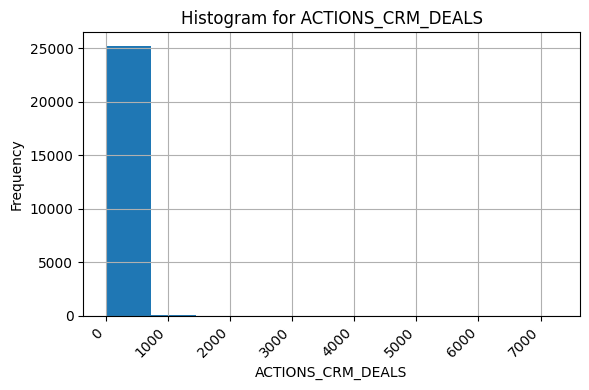

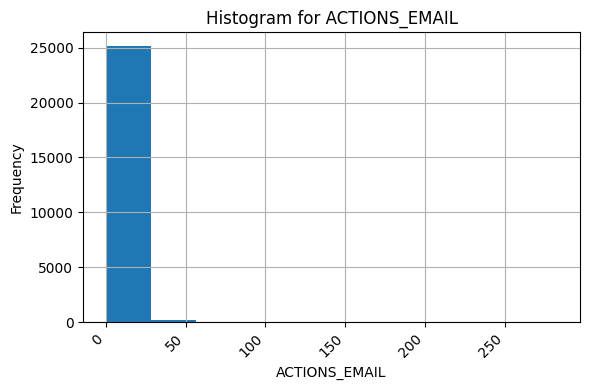

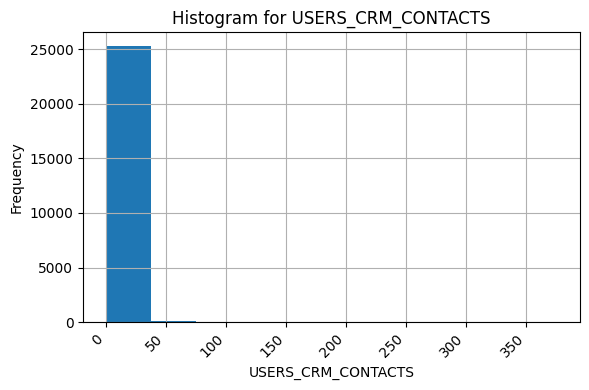

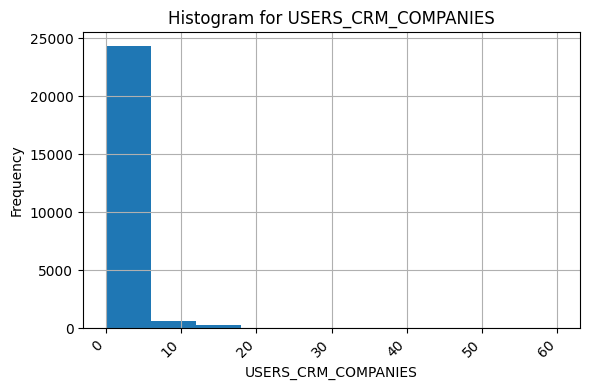

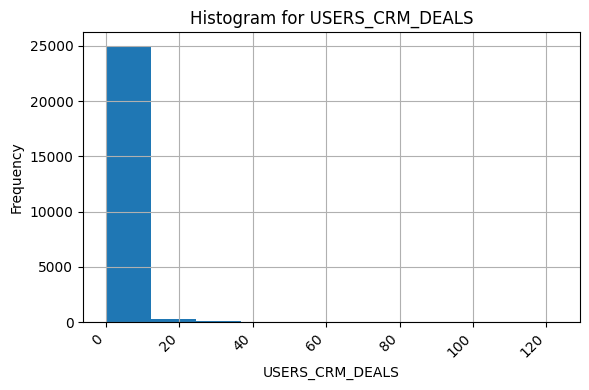

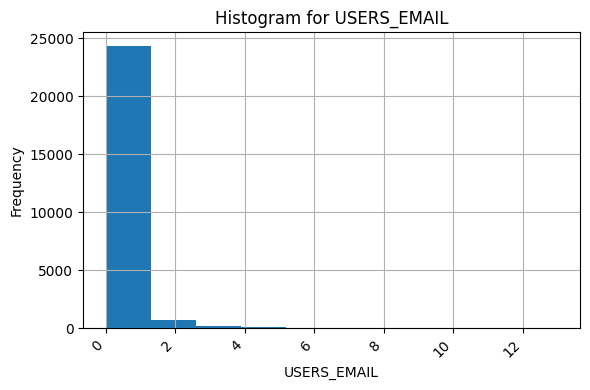

In [41]:
num_columns = [col_name for col_name in usage_df.columns if col_name not in ["id", "WHEN_TIMESTAMP"]]
for col_name in num_columns:
    plt.figure(figsize=(6, 4))
    usage_df[col_name].hist(bins=10)
    plt.title(f"Histogram for {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")  
    plt.tight_layout()                   
    plt.show()

In [46]:
iqr_threshold = 3
for col_name in num_columns:
    Q1 = usage_df[col_name].quantile(0.25)
    Q3 = usage_df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    outliers = usage_df[(usage_df[col_name] < lower_bound) | (usage_df[col_name] > upper_bound)]
    print(f"Number of outliers in {col_name}: {outliers.shape[0]}")

    zero_values = usage_df[usage_df[col_name] == 0]
    print(f"Number of zero values in {col_name}: {zero_values.shape[0]}")

Number of outliers in ACTIONS_CRM_CONTACTS: 3147
Number of zero values in ACTIONS_CRM_CONTACTS: 11051
Number of outliers in ACTIONS_CRM_COMPANIES: 4011
Number of zero values in ACTIONS_CRM_COMPANIES: 17502
Number of outliers in ACTIONS_CRM_DEALS: 4099
Number of zero values in ACTIONS_CRM_DEALS: 17157
Number of outliers in ACTIONS_EMAIL: 3523
Number of zero values in ACTIONS_EMAIL: 21864
Number of outliers in USERS_CRM_CONTACTS: 1448
Number of zero values in USERS_CRM_CONTACTS: 11051
Number of outliers in USERS_CRM_COMPANIES: 1340
Number of zero values in USERS_CRM_COMPANIES: 17502
Number of outliers in USERS_CRM_DEALS: 2025
Number of zero values in USERS_CRM_DEALS: 17157
Number of outliers in USERS_EMAIL: 3523
Number of zero values in USERS_EMAIL: 21864


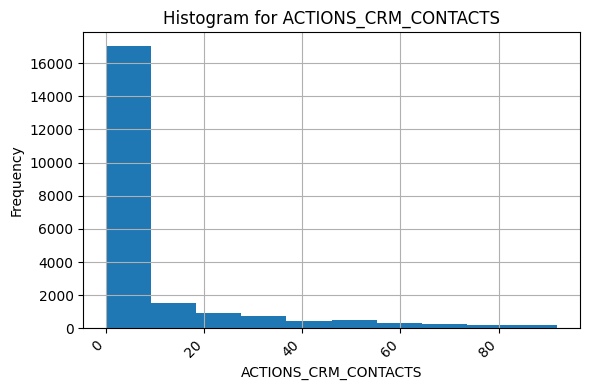

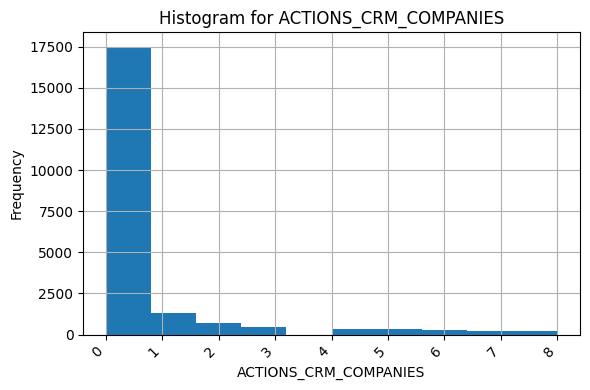

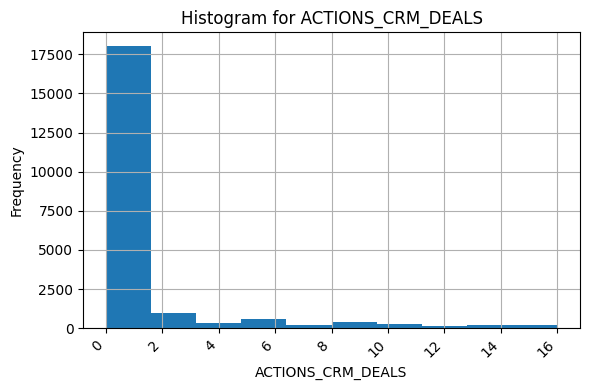

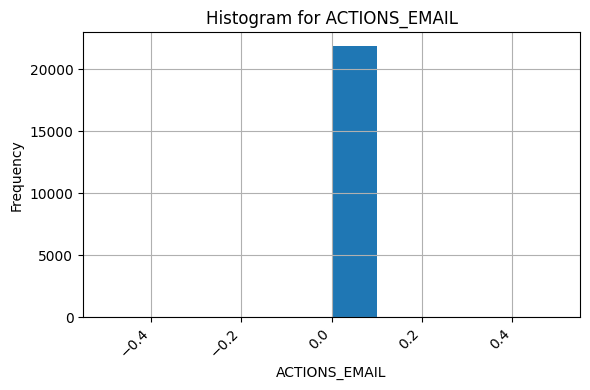

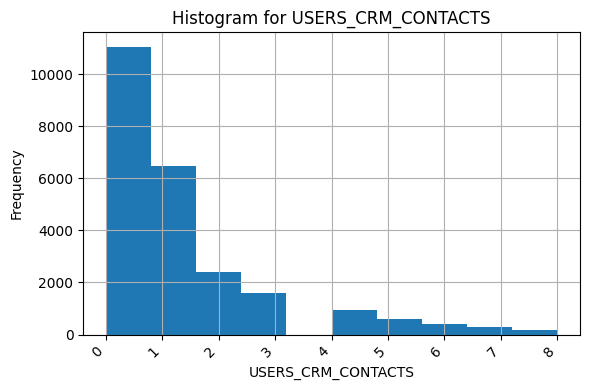

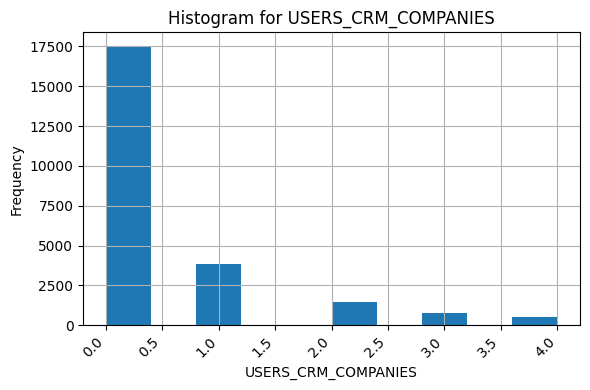

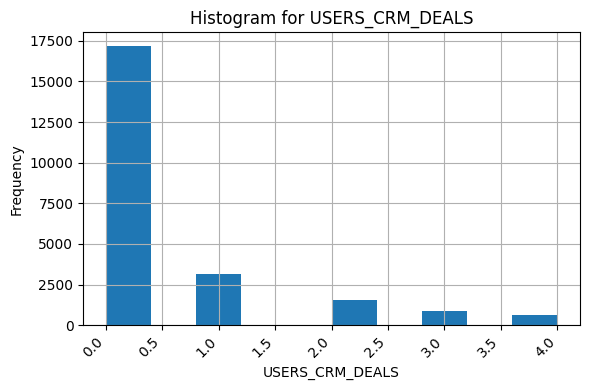

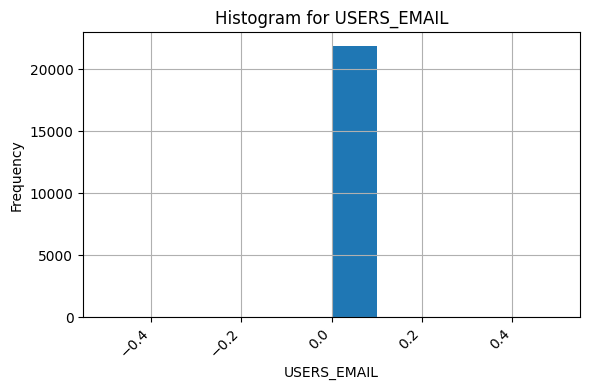

In [47]:
for col_name in num_columns:
    # Plot histogram without outliers
    Q1 = usage_df[col_name].quantile(0.25)
    Q3 = usage_df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    filtered_data = usage_df[(usage_df[col_name] >= lower_bound) & (usage_df[col_name] <= upper_bound)]

    plt.figure(figsize=(6, 4))
    filtered_data[col_name].hist(bins=10)
    plt.title(f"Histogram for {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")  
    plt.tight_layout()                   
    plt.show()